# Introduction

- Task : Multi-class Classification    
- Method : Linear Neural Network   
- Dataset : CIFAR-10
    - Unlike kNN, which is previous tutorial, "datasets" library from hugginface is used for convenience.

# 0. Set Environment

In [19]:
import torch
from torch.utils.data import Dataset
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from tqdm import tqdm

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Selected device:", device)

torch.manual_seed(42)

# 1. Process Data

In [21]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('./data/',
                                 download = True, train = True, transform = transform)

test_dataset = datasets.CIFAR10('./data/',
                                download = True, train = False, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                          shuffle=True, num_workers = 0)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,
                                         shuffle = False, num_workers = 0)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Model

## 2-1. Model Structure

In [23]:
class LinearClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view((x.size(0), -1))
        x = F.softmax(self.fc(x), dim = 1)
        return x

## 2-2. Hyperparameter & Functions

In [24]:
input_size = 3*32*32
num_classes = 10

model = LinearClassifier(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
model.to(device)
criterion.to(device)

# Limitation

# 3. Train

In [25]:
def train_model(model, cirterion, optimizer, trainloader, num_epochs):
    print("-----Training Started------")
    for epoch in range(num_epochs):

        model.train()

        running_loss = 0.0
        
        for images, labels in tqdm(trainloader):
            
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(trainloader.dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
        
        torch.save(model, '/home/june/__github__/study-MLDL/models/Linear_model.pth')
        
    print("-----Training Completed-----")

In [26]:
num_epochs = 16

train_model(model, criterion, optimizer, trainloader, num_epochs)

-----Training Started------


100%|██████████| 782/782 [00:08<00:00, 97.51it/s] 


Epoch [1/16], Loss: 2.1989


100%|██████████| 782/782 [00:08<00:00, 97.11it/s] 


Epoch [2/16], Loss: 2.1341


100%|██████████| 782/782 [00:08<00:00, 97.69it/s] 


Epoch [3/16], Loss: 2.1134


100%|██████████| 782/782 [00:08<00:00, 97.29it/s] 


Epoch [4/16], Loss: 2.1015


100%|██████████| 782/782 [00:08<00:00, 96.91it/s] 


Epoch [5/16], Loss: 2.0928


100%|██████████| 782/782 [00:08<00:00, 96.85it/s] 


Epoch [6/16], Loss: 2.0861


100%|██████████| 782/782 [00:08<00:00, 96.84it/s] 


Epoch [7/16], Loss: 2.0807


100%|██████████| 782/782 [00:08<00:00, 96.69it/s] 


Epoch [8/16], Loss: 2.0762


100%|██████████| 782/782 [00:08<00:00, 96.63it/s] 


Epoch [9/16], Loss: 2.0723


100%|██████████| 782/782 [00:08<00:00, 96.73it/s] 


Epoch [10/16], Loss: 2.0690


100%|██████████| 782/782 [00:08<00:00, 97.16it/s] 


Epoch [11/16], Loss: 2.0661


100%|██████████| 782/782 [00:08<00:00, 96.90it/s] 


Epoch [12/16], Loss: 2.0634


100%|██████████| 782/782 [00:08<00:00, 97.03it/s] 


Epoch [13/16], Loss: 2.0611


100%|██████████| 782/782 [00:08<00:00, 97.38it/s] 


Epoch [14/16], Loss: 2.0589


100%|██████████| 782/782 [00:08<00:00, 97.49it/s] 


Epoch [15/16], Loss: 2.0569


100%|██████████| 782/782 [00:08<00:00, 97.42it/s] 

Epoch [16/16], Loss: 2.0551
-----Training Completed-----


# 4. Test

In [29]:
def test_model(model, testloader):
    
    model.eval()
    
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(testloader):
            
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy on test set: {accuracy:.4f}")

In [30]:
test_model(model, testloader)

100%|██████████| 157/157 [00:01<00:00, 97.52it/s] 

Accuracy on test set: 0.4036


# 5. Inference

# 6. Visualize Results

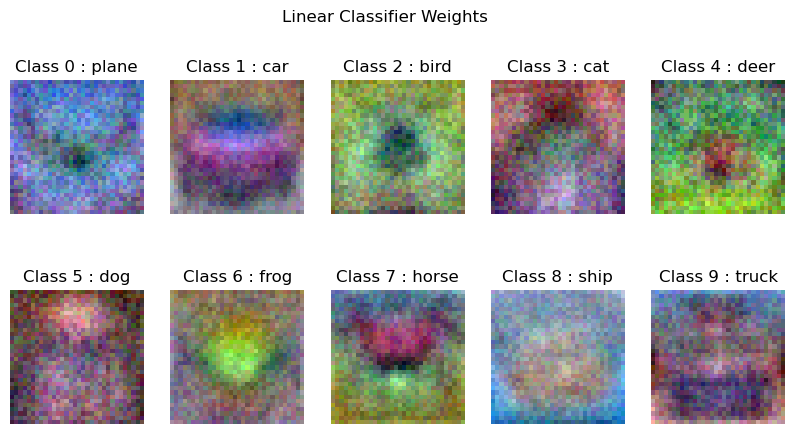

In [36]:
model = LinearClassifier()
model.load_state_dict(torch.loac('/home/june/__github__/study-MLDL/models/Linear_model.pth'))
weights = model.fc.weight.data.cpu().numpy()

plt.figure(figsize=(10, 5))
for i in range(num_classes):
    plt.subplot(2, 5, i+1)
    scaled_weights = (weights[i] - weights[i].min()) / (weights[i].max() - weights[i].min())
    scaled_weights = (scaled_weights * 255).astype(np.uint8)
    plt.imshow(scaled_weights.reshape(3, 32, 32).transpose(1,2,0))
    
    plt.title(f'Class {i} : {classes[i]}')
    plt.axis('off')
plt.suptitle('Linear Classifier Weights')
plt.show()

# Limitation